## Observations and Insights

### Most of these treatments are not distinguishable from placebo. In mean tumor volume, only Ramicane and Capomulin stand out as ending in noticeably smaller  tumors. In the three individual mice chosen for in-depth examination of Capomulin, the tumor steadily shrank with each succeeding timepoint. This is borne out in the box plots, where Ramicane and Capomulin not only have a smaller mean tumor size than Propriva and Ceftamin, but these two effective drugs also show outliers with much smaller tumor volumes, in contrast to the ineffective ones, with outliers at larger tumor sizes.

### Capomulin and Ramicane were the only two drugs with more than 200 measurements. This also supports their effectiveness, because every surviving mouse was measured at every timepoint. The other drugs tested, and the placebo, experienced mouse mortality during the course of treatment, which resulted in fewer mice to measure at later timepoints. Propriva actually showed higher mouse mortality than placebo, which likely accounts for its slightly smaller mean tumor volume, i.e. mice died before their tumors reached full size.

### Historically, many mouse experiments have worked only with male mice in an effort to minimize metabolic variability, but this raises questions as to whether a given drug regimen will be as effective in females. In this study, approximately equal numbers of male and female mice were used. Further analysis of Capomulin and Ramicane, grouped by sex, would help to elucidate whether these drugs differ in efficacy by sex.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [2]:
# Combine the data into a single dataset
all_trials_df = pd.merge(mouse_metadata, study_results, on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
all_trials_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
means = all_trials_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
medians = all_trials_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variances = all_trials_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sdevs = all_trials_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sems = all_trials_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Display dataframe
summary_df = pd.DataFrame({"Mean Tumor Volume" : means,
                         "Median Tumor Volume" : medians,
                         "Variance of Tumor Volumes" : variances,
                         "STDEV of Tumor Volumes" : sdevs,
                          "SEM of Tumor Volumes" : sems})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volumes,STDEV of Tumor Volumes,SEM of Tumor Volumes
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [4]:
summary_df = summary_df.sort_values("Mean Tumor Volume", ascending = True)
summary_df.head()

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volumes,STDEV of Tumor Volumes,SEM of Tumor Volumes
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236


## Bar plots

Text(0, 0.5, 'Number of Measurements')

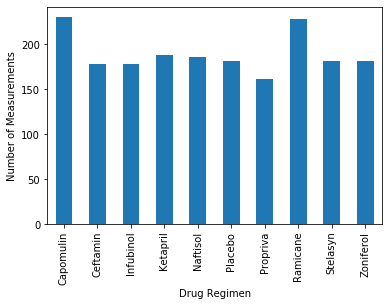

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
measurements = all_trials_df.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"]

ax = measurements.plot(kind = 'bar')
plt.ylabel("Number of Measurements")

In [22]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen = all_trials_df(["Drug Regimen"])
measurements = all_trials_df.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"]
plt.bar(regimen, measurements)
plt.title("Data Points per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

TypeError: 'DataFrame' object is not callable

## Pie plots

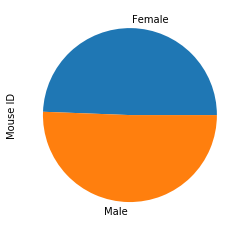

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = all_trials_df.groupby(["Sex"]).count()["Mouse ID"]
mf_plot = mice_sex.plot.pie(y = 'mice_sex')

([<matplotlib.patches.Wedge at 0x1e54653b848>,
 [Text(0.02099250347258556, 1.0997996703027118, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')])

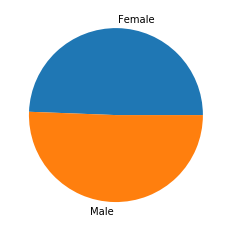

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = all_trials_df.groupby(["Sex"]).count()["Mouse ID"]
labels = 'Female', 'Male'
plt.pie(mice_sex, labels = labels)

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.
tumor_volume = all_trials_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

<class 'numpy.ndarray'>


[Text(0.5, 0, 'Ceftamin')]

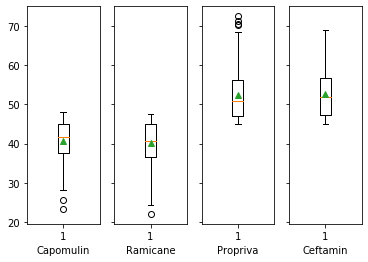

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin_df = all_trials_df[all_trials_df["Drug Regimen"] == "Capomulin"]
ramicane_df = all_trials_df[all_trials_df["Drug Regimen"] == "Ramicane"]
propriva_df = all_trials_df[all_trials_df["Drug Regimen"] == "Propriva"]
ceftamin_df = all_trials_df[all_trials_df["Drug Regimen"] == "Ceftamin"]
fig1, ax1 = plt.subplots(1, 4, sharey = True)

print(type(ax1))
ax1[0].boxplot(capomulin_df["Tumor Volume (mm3)"], showmeans = True)
ax1[0].set(xlabel="Capomulin")
ax1[1].boxplot(ramicane_df["Tumor Volume (mm3)"], showmeans = True)
ax1[1].set(xlabel="Ramicane")
ax1[2].boxplot(propriva_df["Tumor Volume (mm3)"], showmeans = True)
ax1[2].set(xlabel="Propriva")
ax1[3].boxplot(ceftamin_df["Tumor Volume (mm3)"], showmeans = True)
ax1[3].set(xlabel="Ceftamin")

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

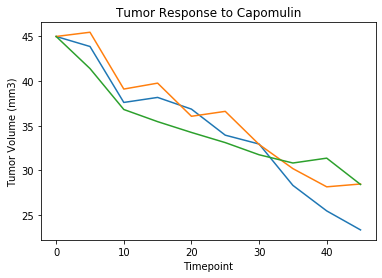

In [11]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Decided to look at three, for a more representative plot
capomulin_df = all_trials_df[all_trials_df["Drug Regimen"] == "Capomulin"]
mouse_id_df = capomulin_df[capomulin_df["Mouse ID"] == "s185"]
mouse_id_df_2 = capomulin_df[capomulin_df["Mouse ID"] == "x401"]
mouse_id_df_3 = capomulin_df[capomulin_df["Mouse ID"] == "m601"]
plt.plot(mouse_id_df["Timepoint"], mouse_id_df["Tumor Volume (mm3)"])
plt.plot(mouse_id_df_2["Timepoint"], mouse_id_df_2["Tumor Volume (mm3)"])
plt.plot(mouse_id_df_3["Timepoint"], mouse_id_df_3["Tumor Volume (mm3)"])
plt.title("Tumor Response to Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

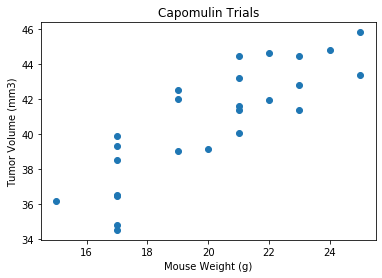

In [12]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mice = all_trials_df[all_trials_df['Drug Regimen'] == "Capomulin"]
weight = capomulin_mice.groupby(["Mouse ID"]).mean()["Weight (g)"]
volume = capomulin_mice.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
plt.scatter(weight, volume)
plt.title("Capomulin Trials")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

pearson correlation:  (0.8419363424694717, 1.322572243471279e-07)
slope:  0.9544396890241045
intercept:  21.552160532685015
r value:  0.8419363424694718
r-squared:  0.7088568047708717
p value:  1.3225722434712642e-07
standard error:  0.1275435903320134


Text(0, 0.5, 'Tumor Volume (mm3)')

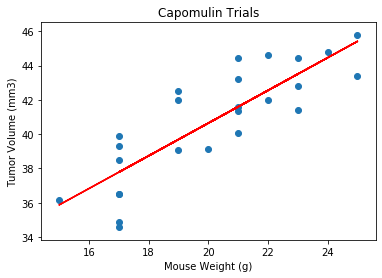

In [25]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
# for the Capomulin regimen
correlation = st.pearsonr(weight, volume)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(weight, volume)
line = vc_slope * weight+vc_int
print("pearson correlation: ", correlation)
print("slope: ", vc_slope)
print("intercept: ", vc_int)
print("r value: ", vc_r)
print("r-squared: ", vc_r ** 2)
print("p value: ", vc_p)
print("standard error: ", vc_std_err)
plt.plot(weight, line, 'r', label='fitted line')
plt.scatter(weight, volume)
plt.title("Capomulin Trials")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")